In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.externals import joblib
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [5]:
df = pd.read_csv('/content/drive/MyDrive/equality/winequality.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Correlation Matrix

In [9]:
corr_matrix = df.corr()
corr_matrix['quality'].sort_values(ascending = False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

Plotting Graph

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f78d786d0>,
      dtype=object)

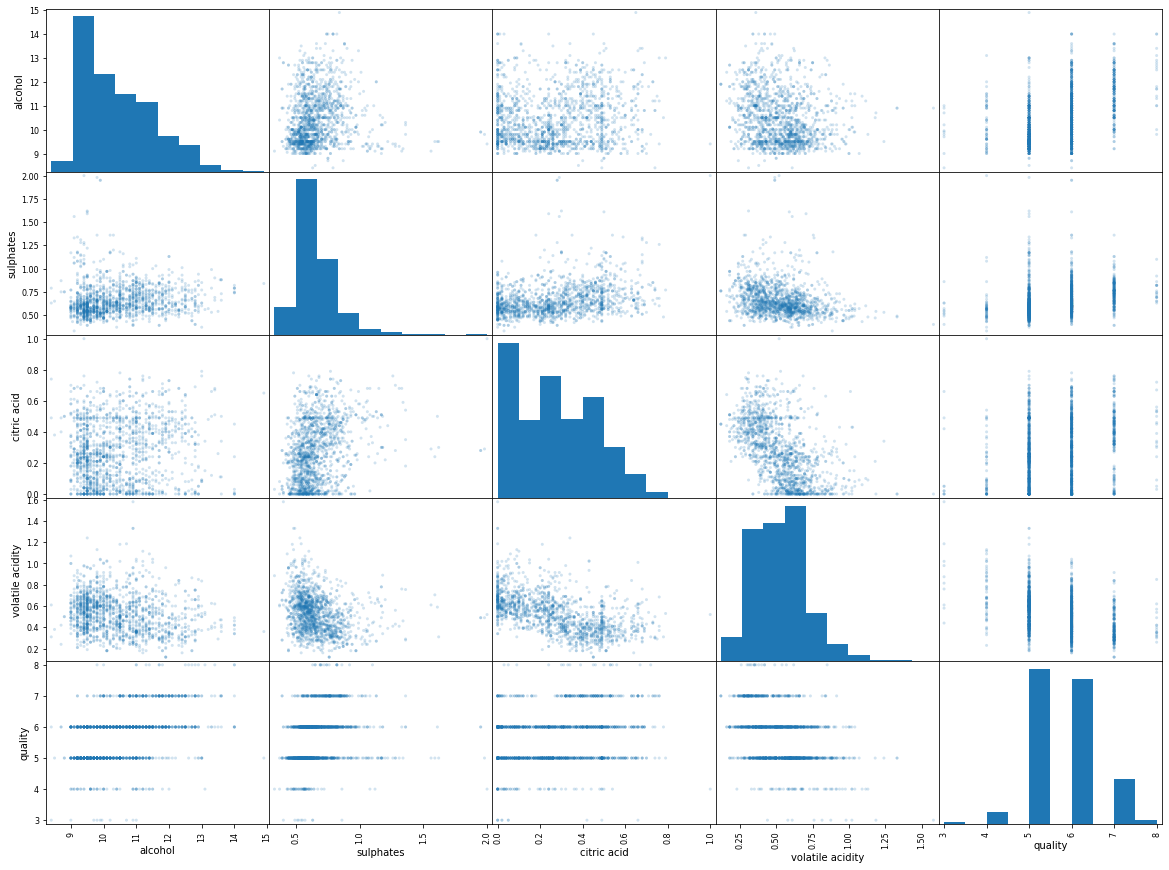

In [14]:
df1 = df[['alcohol','sulphates','citric acid', 'volatile acidity','quality']]
pd.plotting.scatter_matrix(df1, alpha=0.2, figsize= (20,15))

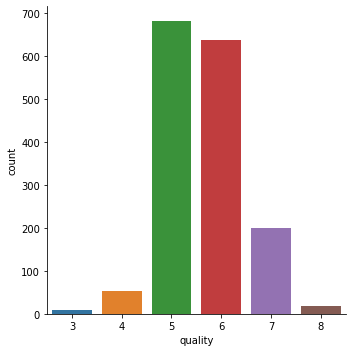

In [15]:
sns.catplot(x = 'quality', data = df, kind = 'count')

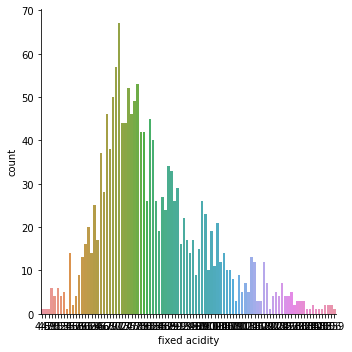

In [23]:
sns.catplot(x = 'fixed acidity', data = df, kind = 'count')

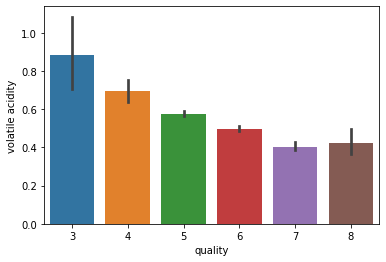

In [21]:
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

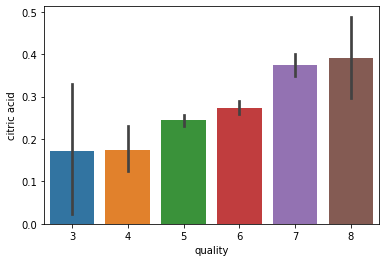

In [24]:
sns.barplot(x = 'quality', y = 'citric acid', data = df)

Plotting Heatmap

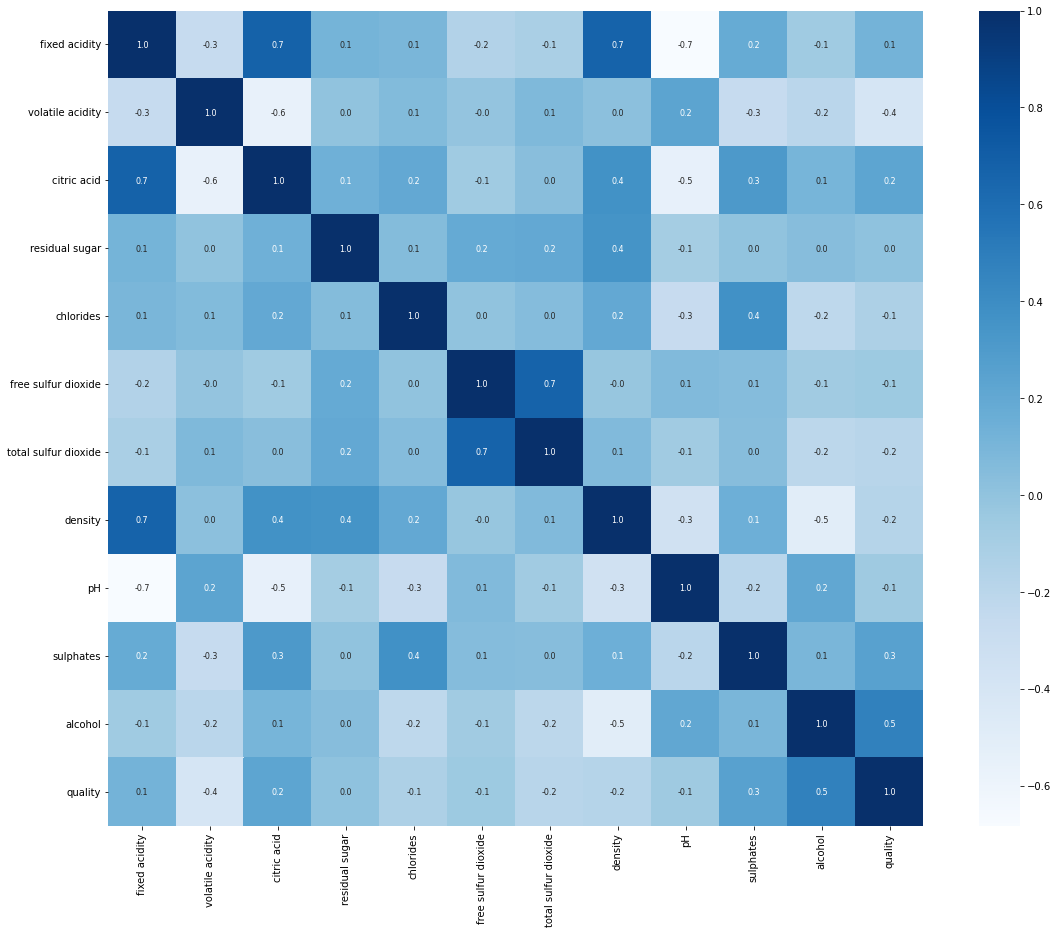

In [40]:
plt.subplots(figsize=(20,15))
sns.heatmap(corr_matrix,cbar = True,square = True, fmt = '.1f', annot = True, annot_kws = {'size':8}, cmap = 'Blues')

Getting X and Y attributes for training the model

In [41]:
x = df.drop(columns = ['quality'])
y = df['quality']

Splitting attributes into training and testing dataset

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In [43]:
len(x_test)

480

Function to check best model for training the dataset

In [44]:
def check(model):
  score = 0
  for model in model:
    model.fit(x_train,y_train)
    model_name = type(model).__name__
    temp_score = model.score(x_test,y_test)
    if temp_score>score:
      score = temp_score
      model_name_best = model_name
      model_final = model
    print(model_name,temp_score)
    print('\n')
  print('The best model is : ',model_name_best,score)
  print('\n')
  return model_final

Input model Array and Getting result

In [45]:
model = [LinearRegression(),LogisticRegression(), SVC(), DecisionTreeClassifier(), Lasso(),Ridge()]
model = check(model)

LinearRegression 0.390817802160335


LogisticRegression 0.5770833333333333


SVC 0.5125


DecisionTreeClassifier 0.6291666666666667


Lasso 0.02128160300175541


Ridge 0.3957457691048356


The best model is :  DecisionTreeClassifier 0.6291666666666667




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Tesing the predicted value of model with Actual value

In [48]:
df.result = df.quality
arr = [6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0]

In [50]:
input = np.array(arr)
predicted = model.predict([input])[0]
Actual = df.result.iloc[1598]
print('The Predicted value is: ', predicted)
print('The Actual value is: ', Actual)

The Predicted value is:  6
The Actual value is:  6


In [53]:
cd /content/drive/MyDrive/quality

/content/drive/MyDrive/quality


In [54]:
joblib.dump(model, 'model.pkl')

['model.pkl']